# PSEUDO LABELLING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder 

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Preprocessing

In [6]:
## mean imputations 
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)
test['Item_Weight'].fillna((test['Item_Weight'].mean()), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_6520\3853422877.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_6520\3853422877.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [8]:
## reducing fat content to only two categories 
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat','LF'], ['Low Fat','Low Fat']) 
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['reg'], ['Regular']) 
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat','LF'], ['Low Fat','Low Fat']) 
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['reg'], ['Regular'])


In [10]:
## for calculating establishment year
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year'] 
test['Outlet_Establishment_Year'] = 2013 - test['Outlet_Establishment_Year'] 

In [12]:
## missing values for size
train['Outlet_Size'].fillna('Small',inplace=True)
test['Outlet_Size'].fillna('Small',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_6520\1547046287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Outlet_Size'].fillna('Small',inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_6520\1547046287.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [14]:
# label encoding categorical variables
col = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Fat_Content']
test['Item_Outlet_Sales'] = 0

# Menggabungkan train dan test menggunakan pd.concat() sebagai pengganti append()
combi = pd.concat([train, test], ignore_index=True)

# Melakukan label encoding
number = LabelEncoder()
for i in col:
    combi[i] = number.fit_transform(combi[i].astype('str'))
    combi[i] = combi[i].astype('int')

# Memisahkan kembali train dan test
train = combi[:train.shape[0]]
test = combi[train.shape[0]:]
test.drop('Item_Outlet_Sales', axis=1, inplace=True)

# Menghapus variabel id
training = train.drop(['Outlet_Identifier', 'Item_Type', 'Item_Identifier'], axis=1)
testing = test.drop(['Outlet_Identifier', 'Item_Type', 'Item_Identifier'], axis=1)
y_train = training['Item_Outlet_Sales']
training.drop('Item_Outlet_Sales', axis=1, inplace=True)

# Definisi variabel
features = training.columns
target = 'Item_Outlet_Sales'

X_train, X_test = training, testing

C:\Users\user\AppData\Local\Temp\ipykernel_6520\796177103.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Item_Outlet_Sales', axis=1, inplace=True)


## Model Exploration

In [17]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [19]:
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
#from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [21]:
model_factory = [
    RandomForestRegressor(),
    XGBRegressor(nthread=1),
    #MLPRegressor(),
    Ridge(),
    BayesianRidge(),
    ExtraTreesRegressor(),
    ElasticNet(),
    KNeighborsRegressor(),
    GradientBoostingRegressor()
]

for model in model_factory:
    model.seed = 42
    num_folds = 3

    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')
    score_description = " %0.2f (+/- %0.2f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)

    print('{model:25} CV-5 RMSE: {score}'.format(
        model=model.__class__.__name__,
        score=score_description
    ))

RandomForestRegressor     CV-5 RMSE:  1149.46 (+/- 24407.90)
XGBRegressor              CV-5 RMSE:  1194.03 (+/- 9844.93)
Ridge                     CV-5 RMSE:  1206.41 (+/- 54020.12)
BayesianRidge             CV-5 RMSE:  1206.56 (+/- 52695.34)
ExtraTreesRegressor       CV-5 RMSE:  1190.36 (+/- 15480.34)
ElasticNet                CV-5 RMSE:  1259.18 (+/- 89803.16)
KNeighborsRegressor       CV-5 RMSE:  1245.71 (+/- 37275.84)
GradientBoostingRegressor CV-5 RMSE:  1086.15 (+/- 19832.09)


In [23]:
## normal submission using xgb
model = XGBRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)

## saving file
sub = pd.DataFrame(data = pred, columns=['Item_Outlet_Sales'])
sub['Item_Identifier'] = test['Item_Identifier']
sub['Outlet_Identifier'] = test['Outlet_Identifier']
#sub.to_csv('bigmart-xgb.csv', index='False')

cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)

array([-1422865.06314891, -1432622.18419024, -1421608.73318773])

In [25]:
from sklearn.utils import shuffle
from sklearn.base import BaseEstimator, RegressorMixin

class PseudoLabeler(BaseEstimator, RegressorMixin):
    '''
    Sci-kit learn wrapper for creating pseudo-lebeled estimators.
    '''
    
    def __init__(self, model, unlabled_data, features, target, sample_rate=0.2, seed=42):
        '''
        @sample_rate - percent of samples used as pseudo-labelled data
                       from the unlabled dataset
        '''
        assert sample_rate <= 1.0, 'Sample_rate should be between 0.0 and 1.0.'
        
        self.sample_rate = sample_rate
        self.seed = seed
        self.model = model
        self.model.seed = seed
        
        self.unlabled_data = unlabled_data
        self.features = features
        self.target = target
        
    def get_params(self, deep=True):
        return {
            "sample_rate": self.sample_rate,
            "seed": self.seed,
            "model": self.model,
            "unlabled_data": self.unlabled_data,
            "features": self.features,
            "target": self.target
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

        
    def fit(self, X, y):
        '''
        Fit the data using pseudo labeling.
        '''

        augemented_train = self.__create_augmented_train(X, y)
        self.model.fit(
            augemented_train[self.features],
            augemented_train[self.target]
        )
        
        return self


    def __create_augmented_train(self, X, y):
        '''
        Create and return the augmented_train set that consists
        of pseudo-labeled and labeled data.
        '''        
        num_of_samples = int(len(self.unlabled_data) * self.sample_rate)
        
        # Train the model and creat the pseudo-labels
        self.model.fit(X, y)
        pseudo_labels = self.model.predict(self.unlabled_data[self.features])
        
        # Add the pseudo-labels to the test set
        pseudo_data = self.unlabled_data.copy(deep=True)
        pseudo_data[self.target] = pseudo_labels
        
        # Take a subset of the test set with pseudo-labels and append in onto
        # the training set
        sampled_pseudo_data = pseudo_data.sample(n=num_of_samples)
        temp_train = pd.concat([X, y], axis=1)
        augemented_train = pd.concat([sampled_pseudo_data, temp_train])

        return shuffle(augemented_train)
        
    def predict(self, X):
        '''
        Returns the predicted values.
        '''
        return self.model.predict(X)
    
    def get_model_name(self):
        return self.model.__class__.__name__

## Pseudo Labeler

In [28]:
model = PseudoLabeler(
    XGBRegressor(nthread=1),
    test,
    features,
    target,
    sample_rate = 0.3
)

model.fit(X_train, y_train)
pred = model.predict(X_test)
cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)

array([-1404505.69351986, -1384772.80110898, -1401139.0510891 ])

In [30]:
sub = pd.DataFrame(data = pred, columns=['Item_Outlet_Sales'])
sub['Item_Identifier'] = test['Item_Identifier']
sub['Outlet_Identifier'] = test['Outlet_Identifier']
sub.to_csv('pseudo-labelling.csv', index='False')

## Comparing xgboost with pseudo labelling

In [33]:
model_factory = [
    XGBRegressor(nthread=1),
    
    PseudoLabeler(
        XGBRegressor(nthread=1),
        test,
        features,
        target,
        sample_rate=0.3
    ),
]

for model in model_factory:
    model.seed = 42
    num_folds = 8
    
    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
    score_description = "MSE: %0.4f (+/- %0.4f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)

    print('{model:25} CV-{num_folds} {score_cv}'.format(
        model=model.__class__.__name__,
        num_folds=num_folds,
        score_cv=score_description
    ))

XGBRegressor              CV-8 MSE: 1183.6297 (+/- 156156.5398)
PseudoLabeler             CV-8 MSE: 1169.6616 (+/- 145538.2585)


## Performance of pseudo-labelling 

In [36]:
sample_rates = np.linspace(0, 1, 10)

def pseudo_label_wrapper(model):
    return PseudoLabeler(model, test, features, target)

# List of all models to test
model_factory = [
    RandomForestRegressor(n_jobs=1),
    XGBRegressor(),
]

# Apply the PseudoLabeler class to each model
model_factory = map(pseudo_label_wrapper, model_factory)

# Train each model with different sample rates
results = {}
num_folds = 5

for model in model_factory:
    model_name = model.get_model_name()
    print('%s' % model_name)

    results[model_name] = list()
    for sample_rate in sample_rates:
        model.sample_rate = sample_rate
        
        # Calculate the CV-3 R2 score and store it
        scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
        results[model_name].append(np.sqrt(scores.mean()*-1))

RandomForestRegressor
XGBRegressor


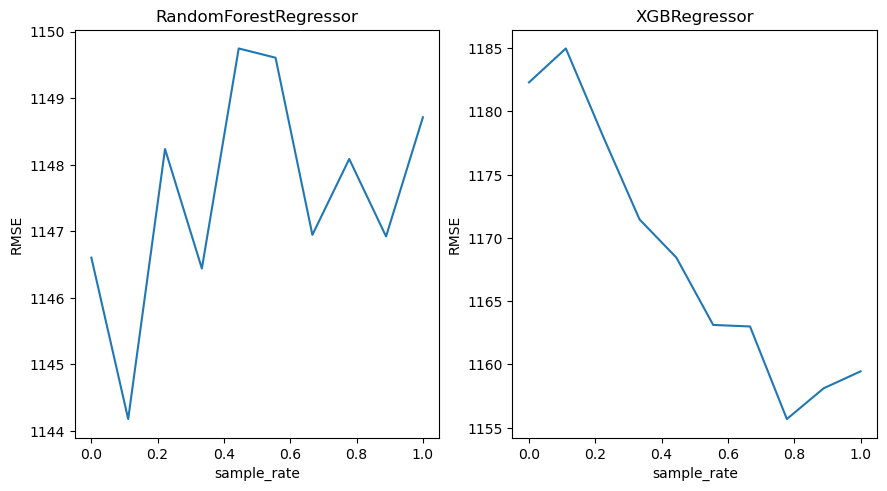

In [37]:
plt.figure(figsize=(16, 18))

i = 1
for model_name, performance in results.items():    
    plt.subplot(3, 3, i)
    i += 1
    
    plt.plot(sample_rates, performance)
    plt.title(model_name)
    plt.xlabel('sample_rate')
    plt.ylabel('RMSE')
    

plt.show()